# PORTFOLIO OPTIMIZACION MAXIMIZING SHARPE-RATIO DE PORTAFOLIO 

## Key Concepts

### BENCHMARK 

In this project, the historical prices of the NASDAQ-100 Index will be employed as the benchmark. It is important to recall that a benchmark is a representative market index used to assess the relative performance of an investment portfolio. Benchmarks serve as reference points to measure portfolio returns, evaluate the effectiveness of portfolio managers’ decisions, and support the development of robust investment strategies.

### Chosen assets

In this proyect, the portfolio is composed by the following assets:

- **NVDA (NVIDIA Corporation)**:   A leading developer of graphics processing units (GPUs), NVIDIA plays a pivotal role in sectors such as video gaming, artificial intelligence, and high-performance computing. Its technological innovations have positioned it as a core component of modern computational infrastructure.
- **MSFT (Microsoft Corporation)**: SA global technology conglomerate, Microsoft is renowned for its software solutions and cloud-based services. The company’s Azure platform, along with its suite of productivity tools such as Microsoft Office, makes it a fundamental player in enterprise digital transformation and cloud computing.
- **NOW (ServiceNow, Inc.)**: A prominent enterprise software company, ServiceNow specialises in workflow automation and IT service management. Its platform facilitates digital workflows for businesses, enhancing efficiency in IT operations and service delivery.
- **MA (Mastercard Inc.)**: As a global provider of electronic payment solutions, Mastercard operates one of the world’s largest payment processing networks. The company is integral to the financial infrastructure enabling secure and efficient electronic transactions across markets.
- **PANW (Palo Alto Networks, Inc.)**: A leading cybersecurity firm, Palo Alto Networks offers advanced solutions in network security, cloud security, and endpoint protection. Its services are critical in safeguarding digital assets and infrastructure in an increasingly connected world. 
- **TSLA (Tesla, Inc.)**: An innovative manufacturer of electric vehicles, solar energy solutions, and autonomous driving software. Tesla is recognised for its integration of sustainable energy technologies and its pioneering role in the development of electric mobility.
- **NFLX (Netflix, Inc.)**: A leading streaming platform with a strong emphasis on the production and distribution of original content. Netflix has significantly influenced global media consumption habits and remains a key player in the entertainment industry.
- **AMD (Advanced Micro Devices, Inc.)**:A major producer of processors and graphics cards, AMD is a direct competitor to industry leaders such as Intel and NVIDIA. The company is known for its high-performance computing products used in personal computers, servers, and gaming systems.
- **V (Visa Inc.)**:  A global leader in digital payments, Visa operates an extensive network that facilitates secure and efficient electronic transactions. It is a cornerstone of modern financial infrastructure, enabling consumer and business payments across the world.
- **GLD (SPDR Gold Shares)**: An exchange-traded fund (ETF) that seeks to track the price of gold. It is widely used as an inflation hedge and a safe-haven asset during periods of market volatility or economic uncertainty.
- **TSM (Taiwan Semiconductor Manufacturing Co.)**:The world’s largest dedicated independent semiconductor foundry. TSMC manufactures chips for many leading technology companies and plays a critical role in the global supply chain for advanced electronics.
- **JPM (JPMorgan Chase & Co.)**: One of the largest and most influential financial institutions globally, offering services in investment banking, commercial banking, asset management, and wealth management. JPMorgan is integral to global financial markets and corporate finance.
- **TMUS (T-Mobile US, Inc.)**: A major telecommunications provider in the United States, offering mobile and wireless services. T-Mobile is recognised for its network innovation and competitive positioning within the U.S. telecom sector.



### Logaritmic Returns

Logarithmic returns are commonly used in finance to measure the percentage change in the value of an asset over time, particularly when modelling continuous compounding or for statistical analysis due to their additive properties over time.

$$
r_t = ln( \frac {P_t}{P_{t-1}})
$$

donde:

- $r_t$ is the log-return t
- $P_t$ is the asset's price at time t
- $P_{t-1}$ is the price at the previous time period

### CAPM
The Capital Asset Pricing Model (CAPM) is a foundational concept in modern finance, used to determine the expected return of an asset based on its systematic risk relative to the market. It provides a linear relationship between the expected return of an asset and its risk as measured by beta (β). It is defined as:

$$E(R_i) = R_f + \beta_i (E(R_m) - R_f)$$

donde: 

- $E(R_1)$ is the expected return of asset i.
- $R_f$ is the risk free rate.
- $\beta_i$ is asset i's beta, it measures it's market sensibility.
    - $beta = 1 $ Asset moves in line with the market.
    - $beta > 1 $ Asset is more volatile than the market.
    - $beta < 1 $ Asset is less volatile than the market.
- $E(R_m)$ is the expected return of the market.
- $E(R_m) - R_f$ is the market risk premium.

### SHARPE RATIO

The Sharpe Ratio is a widely used metric in finance that quantifies the risk-adjusted return of an investment. It was developed by the economist William F. Sharpe, who was awarded the Nobel Prize in Economic Sciences in 1990 for his contributions to financial theory.

It is defined as:

$$ Sharpe Ratio = \frac {{R_p}-{R_f}}{\sigma_p}$$

Donde:

- $R_p$ represents the average return of the portfolio.
- $R_f$ denotes the risk-free rate of return.
- $\sigma_p$  is the standard deviation of the portfolio's returns, serving as a measure of volatility or total risk.

### PYTHON IMPLEMENTATION

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import kstest, anderson
from pypfopt import expected_returns, EfficientFrontier,get_latest_prices, DiscreteAllocation
import seaborn as sns

In [2]:
tickers = ['NVDA', 'MSFT', 'NOW', 'MA', 'PANW',"TSLA", "NFLX","AMD","V","GLD","TSM","JPM","TMUS","QQQ"]
start_date = '2020-01-01'
end_date = '2025-01-01'
data = yf.download(tickers, start= start_date, end = end_date)['Close']


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  14 of 14 completed


In [3]:
historic_prices = data.reset_index()
historic_prices['Date'] = pd.to_datetime(historic_prices['Date'])
historic_prices = historic_prices.set_index('Date')
historic_prices = historic_prices.dropna()


In [4]:
historic_prices2 = historic_prices.copy()
assets_df = historic_prices2.loc[:, historic_prices2.columns != 'QQQ']


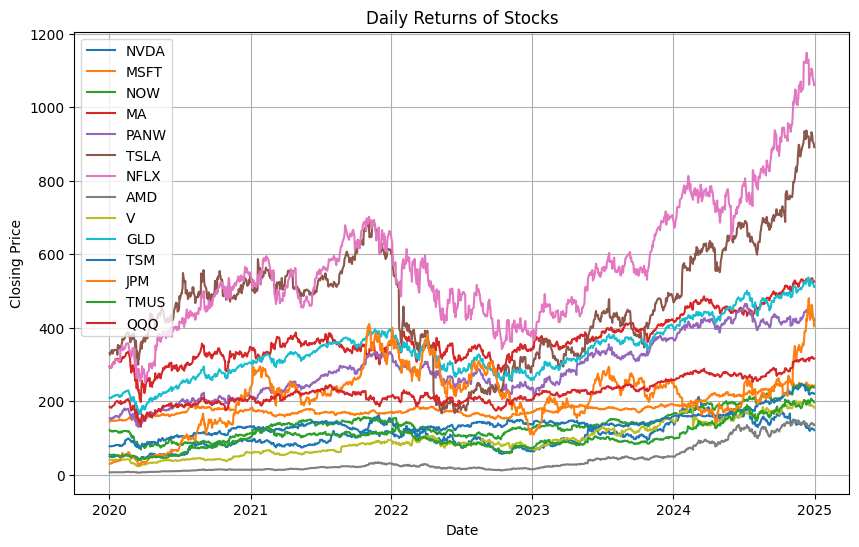

In [5]:
plt.figure(figsize=(10, 6))
plt.title('Daily Returns of Stocks')
plt.plot(historic_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(tickers)
plt.grid()
plt.show()

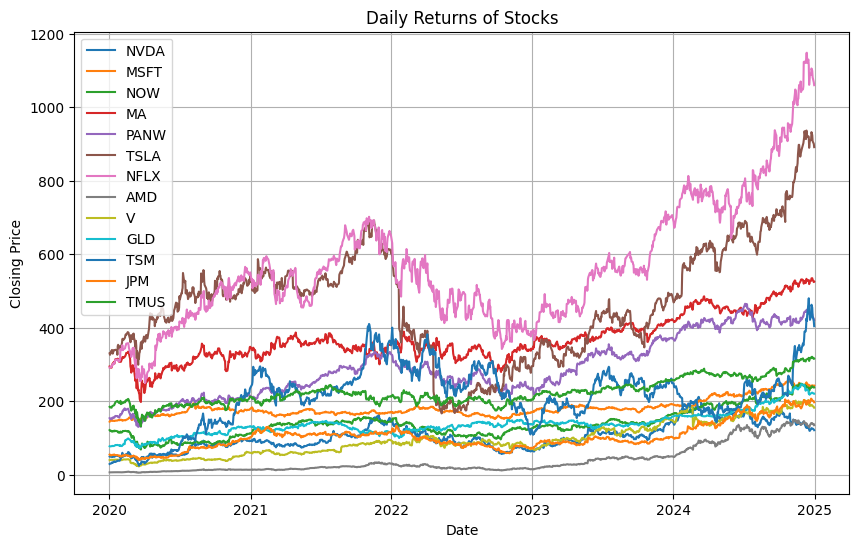

In [6]:
plt.figure(figsize=(10, 6))
plt.title('Daily Returns of Stocks')
plt.plot(assets_df)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(tickers)
plt.grid()
plt.show()

In [7]:
log_returns = np.log(historic_prices).diff().dropna()
log_returns.head(5)


Ticker,AMD,GLD,JPM,MA,MSFT,NFLX,NOW,NVDA,PANW,QQQ,TMUS,TSLA,TSM,V
Date,,,,,,,,,,,,,,
2020-01-03,-0.010236,0.013181,-0.013284,-0.009804,-0.012530,-0.011926,-0.000481,-0.016136,0.006014,-0.009202,-0.005358,0.029203,-0.033534,-0.007985
2020-01-06,-0.004330,0.010435,-0.000795,0.002659,0.002581,0.030014,0.006062,0.004185,0.014379,0.006422,0.005740,0.019072,-0.011607,-0.002165
2020-01-07,-0.002897,0.003927,-0.017147,-0.003392,-0.009160,-0.015242,0.000137,0.012034,0.005727,-0.000139,0.003808,0.038067,0.016075,-0.002647
2020-01-08,-0.008743,-0.007530,0.007770,0.017491,0.015803,0.025404,0.009311,0.001874,-0.012786,0.007488,0.006316,0.048033,0.007346,0.016973
2020-01-09,0.023555,-0.005668,0.003645,0.013025,0.012416,-0.010668,0.012304,0.010923,0.006268,0.008438,0.004899,-0.022189,0.008137,0.006906


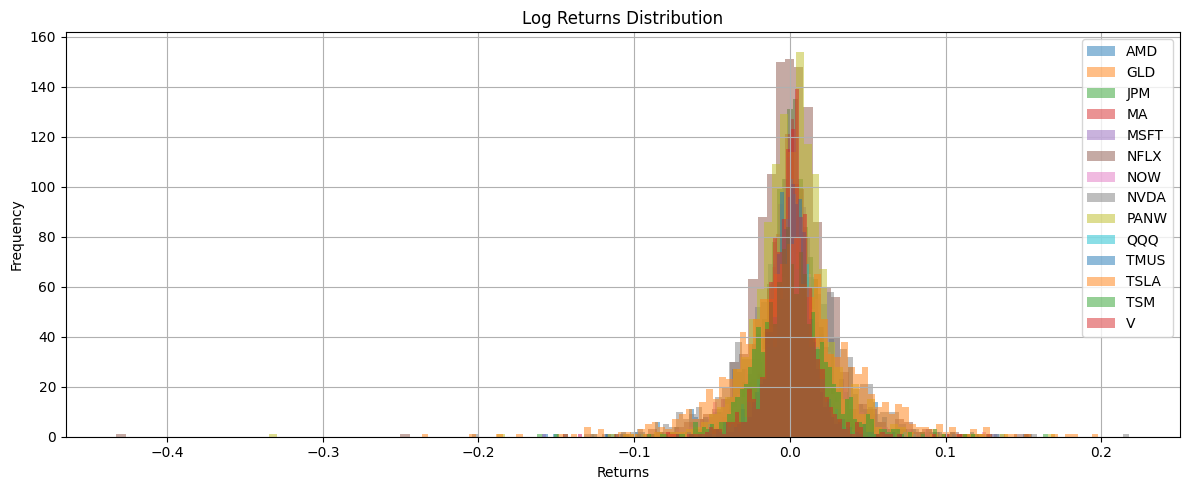

In [8]:
plt.figure(figsize=(12, 5))
for col in log_returns.columns:
    plt.hist(log_returns[col], bins=100, alpha=0.5, label=col)
plt.title('Log Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
returns_data = True

In [10]:
assets_return = log_returns.loc[:, log_returns.columns != 'QQQ']
df_benchmark1 = log_returns.loc[:, log_returns.columns == 'QQQ']
df_benchmark1

Ticker,QQQ
Date,
2020-01-03,-0.009202
2020-01-06,0.006422
2020-01-07,-0.000139
2020-01-08,0.007488
2020-01-09,0.008438
...,...
2024-12-24,0.013469
2024-12-26,-0.000680
2024-12-27,-0.013382


In [11]:
returns1 = expected_returns.capm_return(assets_return, market_prices=df_benchmark1, returns_data= True, risk_free_rate=0.045)
returns1

AMD     0.212482
GLD     0.056452
JPM     0.116531
MA      0.136702
MSFT    0.161614
NFLX    0.162943
NOW     0.179998
NVDA    0.233202
PANW    0.150050
TMUS    0.106931
TSLA    0.219816
TSM     0.156340
V       0.126126
Name: mkt, dtype: float64

In [12]:
def PortfolioWeights(dataframe):
    array = []     
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
weights = PortfolioWeights(assets_df)
pd.Series(weights, index = assets_df.columns, name = 'Portfolio Weights')

Ticker
AMD     0.076923
GLD     0.076923
JPM     0.076923
MA      0.076923
MSFT    0.076923
NFLX    0.076923
NOW     0.076923
NVDA    0.076923
PANW    0.076923
TMUS    0.076923
TSLA    0.076923
TSM     0.076923
V       0.076923
Name: Portfolio Weights, dtype: float64

In [13]:
df_cov = assets_return.cov()*252
df_cov

Ticker,AMD,GLD,JPM,MA,MSFT,NFLX,NOW,NVDA,PANW,TMUS,TSLA,TSM,V
Ticker,,,,,,,,,,,,,
AMD,0.274356,0.013583,0.051224,0.071545,0.096934,0.106435,0.120412,0.210437,0.091009,0.050304,0.156799,0.123944,0.062136
GLD,0.013583,0.024162,-0.000630,0.004012,0.005969,0.009777,0.007447,0.010755,0.004978,0.003331,0.009074,0.009662,0.002395
JPM,0.051224,-0.000630,0.105292,0.061274,0.042027,0.029314,0.037240,0.057698,0.038582,0.035001,0.061355,0.045638,0.055942
MA,0.071545,0.004012,0.061274,0.095454,0.058636,0.044437,0.065945,0.081408,0.052189,0.041356,0.074144,0.049623,0.078007
MSFT,0.096934,0.005969,0.042027,0.058636,0.093167,0.067576,0.088461,0.112446,0.064123,0.038640,0.093272,0.062460,0.051839
NFLX,0.106435,0.009777,0.029314,0.044437,0.067576,0.219686,0.098802,0.118144,0.069246,0.036010,0.113189,0.063980,0.039556
NOW,0.120412,0.007447,0.037240,0.065945,0.088461,0.098802,0.180019,0.137013,0.097314,0.045778,0.117681,0.074310,0.057956
NVDA,0.210437,0.010755,0.057698,0.081408,0.112446,0.118144,0.137013,0.286405,0.107686,0.051651,0.170989,0.136645,0.071562
PANW,0.091009,0.004978,0.038582,0.052189,0.064123,0.069246,0.097314,0.107686,0.181411,0.036715,0.107042,0.056054,0.046483


In [14]:
portfolio_variance = np.dot(weights.T, np.dot(df_cov, weights))
print(f"Portfolio Variance: {str(round(portfolio_variance * 100, 1))}%")

Portfolio Variance: 7.2%


In [15]:
portfolio_volatility = np.sqrt(portfolio_variance)
print(f"Portfolio Volatility: {str(round(portfolio_volatility * 100, 1))}%")

Portfolio Volatility: 26.9%


In [16]:
portfolio_return = np.dot(returns1, weights)
print(f"Portfolio Return: {str(round(portfolio_return * 100, 3))}%")

Portfolio Return: 15.532%


In [17]:
ef = EfficientFrontier(returns1, cov_matrix=df_cov, weight_bounds=(0, 1))
pesos = ef.max_sharpe(risk_free_rate=0.0455)
cleaned_weights = ef.clean_weights()
print("Optimal Weights:")
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate=0.0455)

Optimal Weights:
OrderedDict([('AMD', 0.05185), ('GLD', 0.03537), ('JPM', 0.06022), ('MA', 0.06355), ('MSFT', 0.35344), ('NFLX', 0.05994), ('NOW', 0.05328), ('NVDA', 0.08961), ('PANW', 0.02783), ('TMUS', 0.05553), ('TSLA', 0.05415), ('TSM', 0.06464), ('V', 0.03058)])
Expected annual return: 16.2%
Annual volatility: 28.0%
Sharpe Ratio: 0.42


(np.float64(0.1620747984502467),
 np.float64(0.2796011445491832),
 np.float64(0.41693247943675926))

In [18]:
latest_prices = get_latest_prices(assets_df)
pesos = cleaned_weights
da = DiscreteAllocation(pesos, latest_prices, total_portfolio_value=1000000)
allocation, leftover = da.lp_portfolio()
print("Assets Amount:", allocation)
print("Spare Money: ${:.2f}".format(leftover))

Assets Amount: {'AMD': 429, 'GLD': 146, 'JPM': 254, 'MA': 121, 'MSFT': 840, 'NFLX': 67, 'NOW': 50, 'NVDA': 667, 'PANW': 153, 'TMUS': 253, 'TSLA': 134, 'TSM': 329, 'V': 97}
Spare Money: $528.33


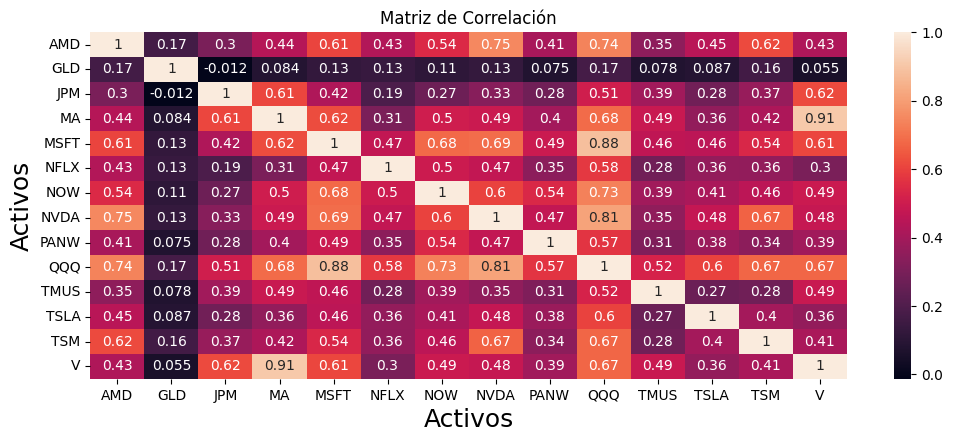

In [19]:
correlation_mat = log_returns.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True) #
plt.title('Matriz de Correlación')
plt.xlabel('Activos',fontsize=18)
plt.ylabel('Activos',fontsize=18)
plt.show()

Is it worth investing in this portfolio?

-If you are a risk-tolerant investor, aiming for growth and comfortable with large fluctuations, this portfolio may be acceptable.
-However, for most risk-averse or risk-neutral investors, a Sharpe Ratio of 0.42 suggests the portfolio is not efficiently compensating for the risk taken.
-It may be worth exploring alternative allocations that aim to increase the Sharpe Ratio, either by reducing volatility or improving returns incorporating diversification or lower-correlation assets.